In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# -----------------------------
# 1. Load the Dataset
# -----------------------------
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

print("Initial Dataset:")
print(df.head(), "\n")

# -----------------------------
# 2. Missing Value Checks
# -----------------------------
print("Checking for missing values:\n")
print(df.isnull().sum(), "\n")

# (Demonstration) – If missing values existed, replacing with column mean:
df_filled = df.fillna(df.mean(numeric_only=True))

# -----------------------------
# 3. Normalize Features (Min-Max Scaling)
# -----------------------------
scaler = MinMaxScaler()

feature_cols = iris.feature_names  # all numeric features
df_scaled = df.copy()
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])

print("Scaled Features (0–1 range):")
print(df_scaled.head(), "\n")

# -----------------------------
# 4. Encoding the Class Label
# -----------------------------
# Option A: Keep as numeric 0,1,2 (good for most ML models)
y_numeric = df['species']

# Option B: One-hot encoding (useful for neural networks)
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(df[['species']])

print("One-hot encoded labels:")
print(y_onehot[:5])


Initial Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0   

Checking for missing values:

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64 

Scaled Features (0–1 range):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2 

First rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0   

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%     

<Figure size 640x480 with 0 Axes>

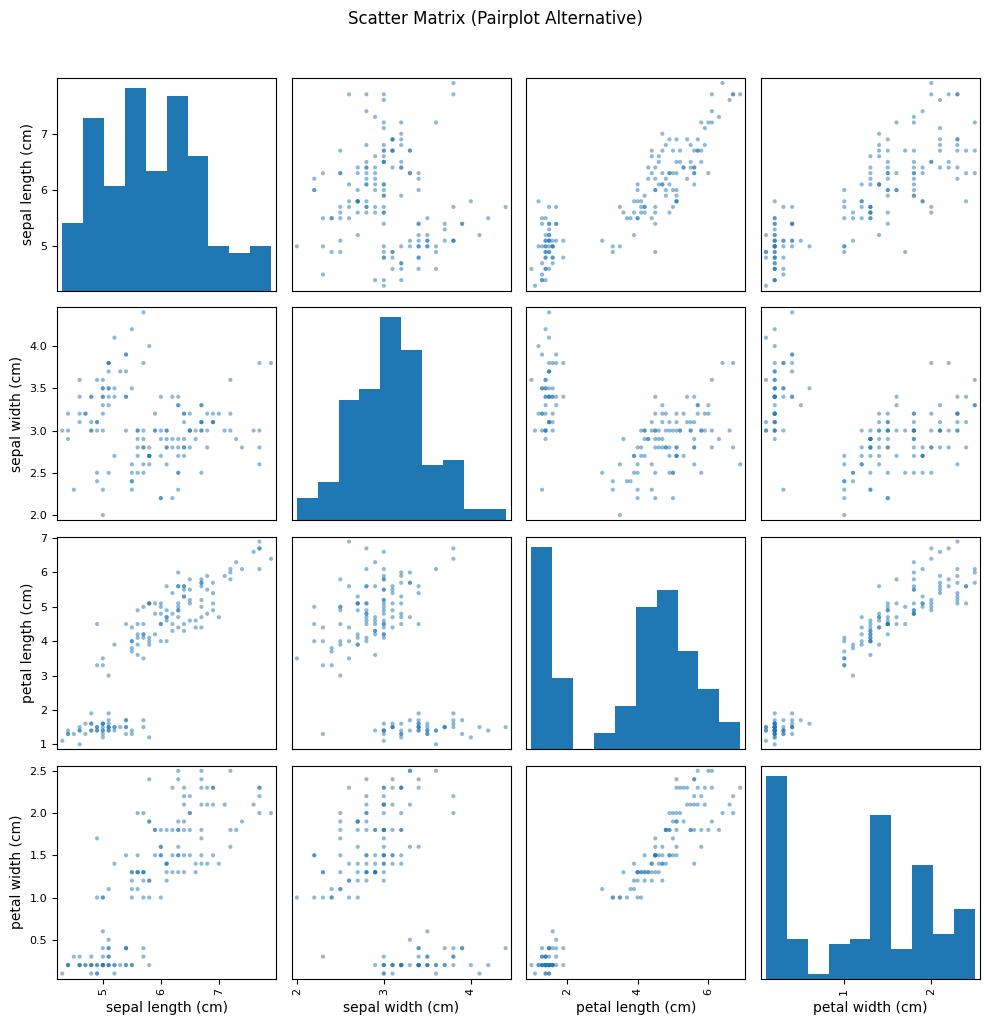

C:\Users\USER\AppData\Local\Temp\ipykernel_34544\2715124476.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


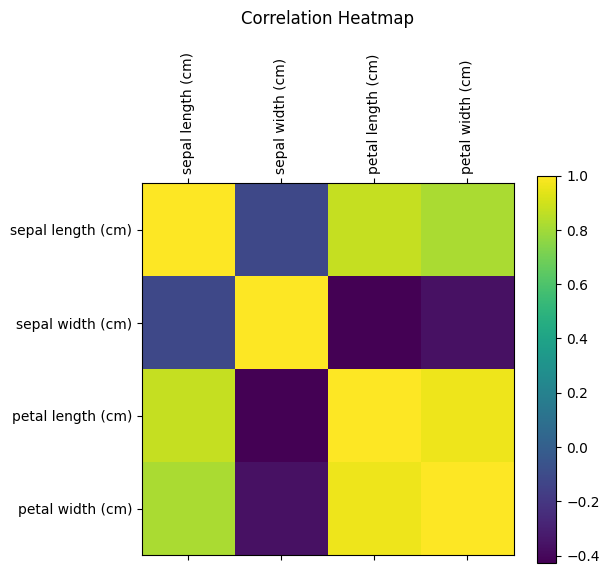

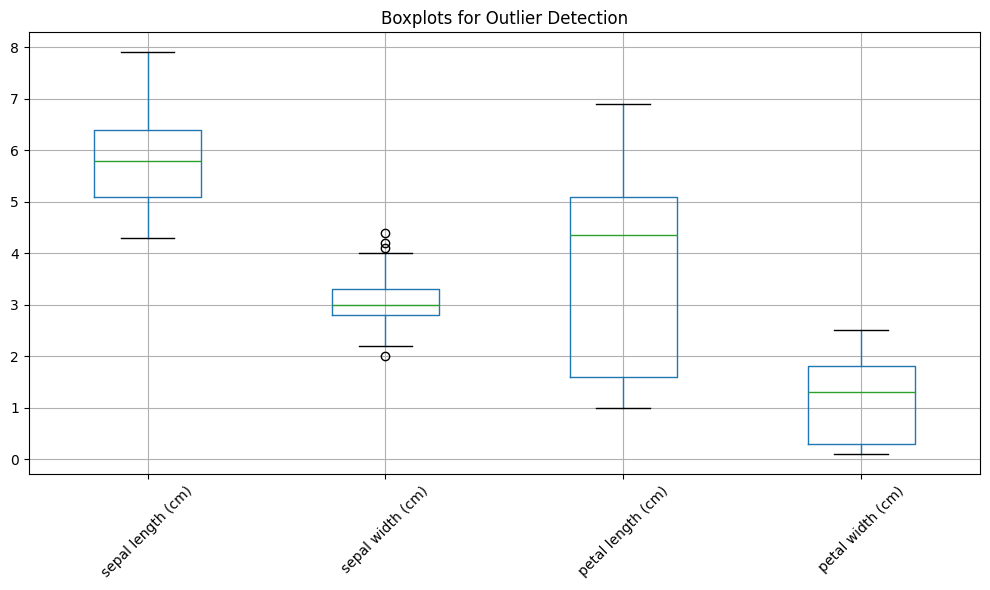

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix

# ---------------------------------------
# 1. Load the Iris Dataset
# ---------------------------------------
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

print("First rows of the dataset:")
print(df.head(), "\n")

# ---------------------------------------
# 2. Summary Statistics
# ---------------------------------------
print("Summary statistics:")
print(df.describe(), "\n")

# ---------------------------------------
# 3. Scatter Matrix (Pairplot alternative)
# ---------------------------------------
plt.figure()
scatter_matrix(df[iris.feature_names], figsize=(10, 10))
plt.suptitle("Scatter Matrix (Pairplot Alternative)", y=1.02)
plt.tight_layout()
plt.show()

# ---------------------------------------
# 4. Correlation Heatmap
# ---------------------------------------
corr = df[iris.feature_names].corr()

plt.figure(figsize=(6, 5))
plt.matshow(corr, fignum=1)
plt.xticks(np.arange(len(iris.feature_names)), iris.feature_names, rotation=90)
plt.yticks(np.arange(len(iris.feature_names)), iris.feature_names)
plt.colorbar()
plt.title("Correlation Heatmap", pad=20)
plt.tight_layout()
plt.show()

# ---------------------------------------
# 5. Boxplots for Outlier Detection
# ---------------------------------------
plt.figure(figsize=(10, 6))
df[iris.feature_names].boxplot()
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

def split_train_test(X, y, test_size=0.20, random_state=42):
    """
    Splits features (X) and labels (y) into 80% training and 20% testing sets.

    Parameters:
        X : Features dataset (DataFrame or NumPy array)
        y : Labels
        test_size : Proportion for the test set (default 0.20)
        random_state : Seed for reproducibility

    Returns:
        X_train, X_test, y_train, y_test
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test


In [6]:
from sklearn.datasets import load_iris
import pandas as pd

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split using the function
X_train, X_test, y_train, y_test = split_train_test(X, y)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (120, 4)
Testing shape: (30, 4)
